In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from IPython import get_ipython
get_ipython().magic('matplotlib inline')


In [20]:

import cv2
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout, Activation, BatchNormalization

np.random.seed(25)

In [21]:
import os
 
print(os.listdir('../EE628 - DL'))
path = '../EE628 - DL/Data/train'
resized_train_path = '../EE628 - DL/Data/train_resized'
test_path = '../EE628 - DL/Data/test1'


['.ipynb_checkpoints', 'CNN_visual.py.ipynb', 'Data', 'FinalProject.ipynb', 'SSapre_HW3.ipynb', 'Ssapre_HW4.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'VariationalAutoEncoder.ipynb', 'VaritaionalAutoEncoder_demo.ipnyb.py']


In [22]:
label=[]
data=[]
counter=0

for file in os.listdir(path):
    image=cv2.imread(os.path.join(path,file), cv2.IMREAD_GRAYSCALE)
    image=cv2.resize(image,(96,96))
    #cv2.imshow('1',image_data)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #break
    if file.startswith("cat"):
        label.append(0)
    elif file.startswith("dog"):
        label.append(1)
    try:
        data.append(image/255)
        
    except:
        label=label[:len(label)-1]
    counter+=1
    if counter%1000==0:
        print (counter," image data retreived")

1000  image data retreived
2000  image data retreived
3000  image data retreived
4000  image data retreived
5000  image data retreived
6000  image data retreived
7000  image data retreived
8000  image data retreived
9000  image data retreived
10000  image data retreived
11000  image data retreived
12000  image data retreived
13000  image data retreived
14000  image data retreived
15000  image data retreived
16000  image data retreived
17000  image data retreived
18000  image data retreived
19000  image data retreived
20000  image data retreived
21000  image data retreived
22000  image data retreived
23000  image data retreived
24000  image data retreived
25000  image data retreived


In [23]:
train_data=np.array(data)

#data2=data2.reshape((data2.shape)[0],(data2.shape)[1],(data2.shape)[2],1)
#data1=data1/255
train_labels=np.array(label)

print (train_data.shape)
print (train_labels.shape)

(25000, 96, 96)
(25000,)


Text(0.5, 1.0, 'Class 0')

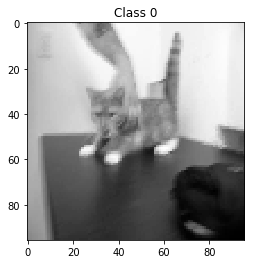

In [24]:
plt.imshow(train_data[0], cmap='gray')
plt.title('Class '+ str(train_labels[0]))

In [25]:
train_data = train_data.reshape(train_data.shape[0], 96, 96, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

train_data = train_data.astype('float32')
#X_test = X_test.astype('float32')

#X_train/=255
#X_test/=255


In [47]:
number_of_classes = 2

train_labels_cat = np_utils.to_categorical(train_labels, number_of_classes)
train_labels_cat[:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(96,96,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [28]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 92, 92, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 44, 44, 64)        0         
__________

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [30]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [31]:
test_data=[]
id=[]
counter=0
for file in os.listdir(test_path):
    image_data=cv2.imread(os.path.join(test_path,file), cv2.IMREAD_GRAYSCALE)
    try:
        image_data=cv2.resize(image_data,(96,96))
        test_data.append(image_data/255)
        id.append((file.split("."))[0])
    except:
        print ("ek gaya")
    counter+=1
    if counter%1000==0:
        print (counter," image data retreived")

1000  image data retreived
2000  image data retreived
3000  image data retreived
4000  image data retreived
5000  image data retreived
6000  image data retreived
7000  image data retreived
8000  image data retreived
9000  image data retreived
10000  image data retreived
11000  image data retreived
12000  image data retreived


In [39]:
test_data1=np.array(test_data)
print (test_data1.shape)
test_data1=test_data1.reshape((test_data1.shape)[0],(test_data1.shape)[1],(test_data1.shape)[2],1)

(12500, 96, 96)


In [48]:
test_labels = model.predict(test_data1)
print(test_labels)

[[0.09890745 0.1036907  0.1020033  ... 0.1011121  0.09999928 0.10015836]
 [0.0987803  0.10054283 0.10142672 ... 0.10141487 0.09930237 0.10191108]
 [0.0984832  0.10208356 0.10247345 ... 0.10131877 0.09782418 0.10194318]
 ...
 [0.09928858 0.10327728 0.10220664 ... 0.10063216 0.1002152  0.10074044]
 [0.09831906 0.10357803 0.10353831 ... 0.1013777  0.10050255 0.09865806]
 [0.09926535 0.10351244 0.10207394 ... 0.10036199 0.10034777 0.10081565]]


In [42]:
score = model.evaluate(test_data1, test_labels)
print()
print('Test accuracy: ', score)

ValueError: Error when checking target: expected activation_12 to have shape (10,) but got array with shape (1,)

In [17]:
predictions = model.predict_classes(test_data1)

actuals = list(test_labels)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

NameError: name 'y_test' is not defined